## Prediction of Demand for Bike Sharing  

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A bike sharing owned company wishes to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the market.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

- To create a linear model that quantitatively relates bike demands with variables provided.

- To know the accuracy of the model, i.e. how well these variables can predict bike demands.


### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing day.csv
bike_bookings_df = pd.read_csv('day.csv')

In [4]:
# Looking at the first five rows
bike_bookings_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike bookings dataframe

In [5]:
bike_bookings_df.shape

(730, 16)

In [6]:
bike_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_bookings_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Data Quality Checks:
- season column has 1,2,3 and 4 values only
- yr column has 0 and 1
- mnth column has 1 to 12 values
- holiday column has 0 and 1
- weekday column has 0 to 6 values
- workingday column has 0 and 1
- weathersit column has 1, 2 and 3 only. No records were found for value 4.

Other fields' values are technically good.

Also noticed that cnt = casual + registered

## Visualising the Data

Let's now understand the data.
- This helps in finding the variables with multicollinearity.
- It also identifies if some predictors directly correlate strongly with the outcome variable.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's make boxplots of all the categorical variables

In [9]:
categorical_vars = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

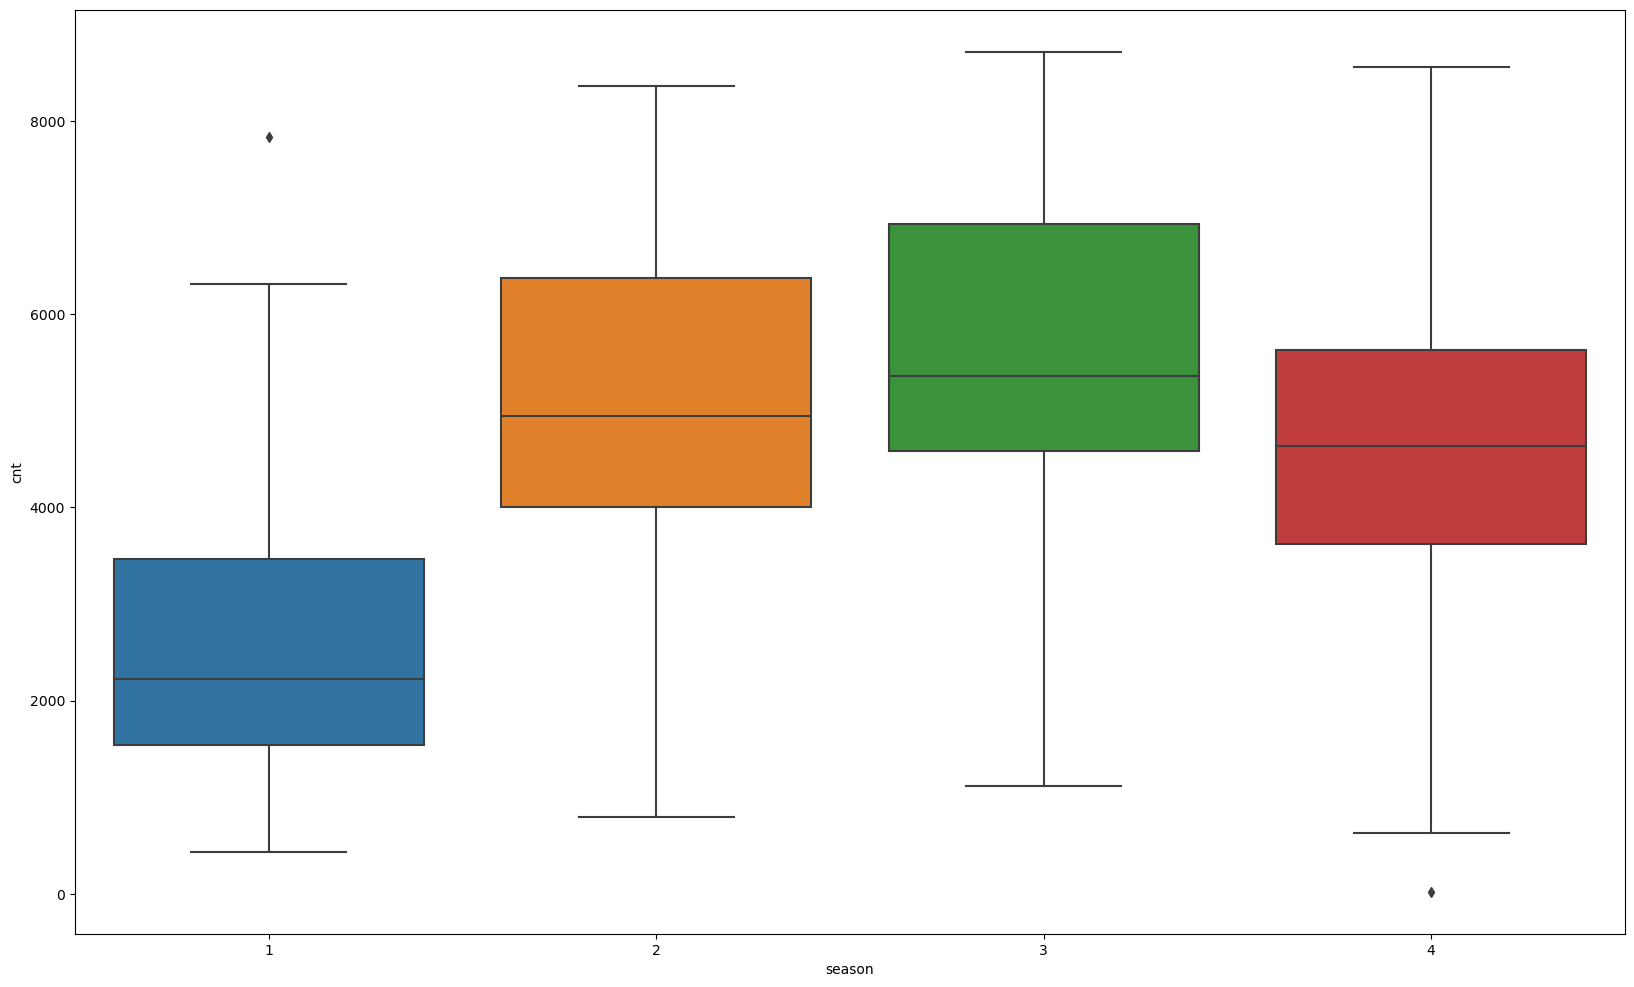

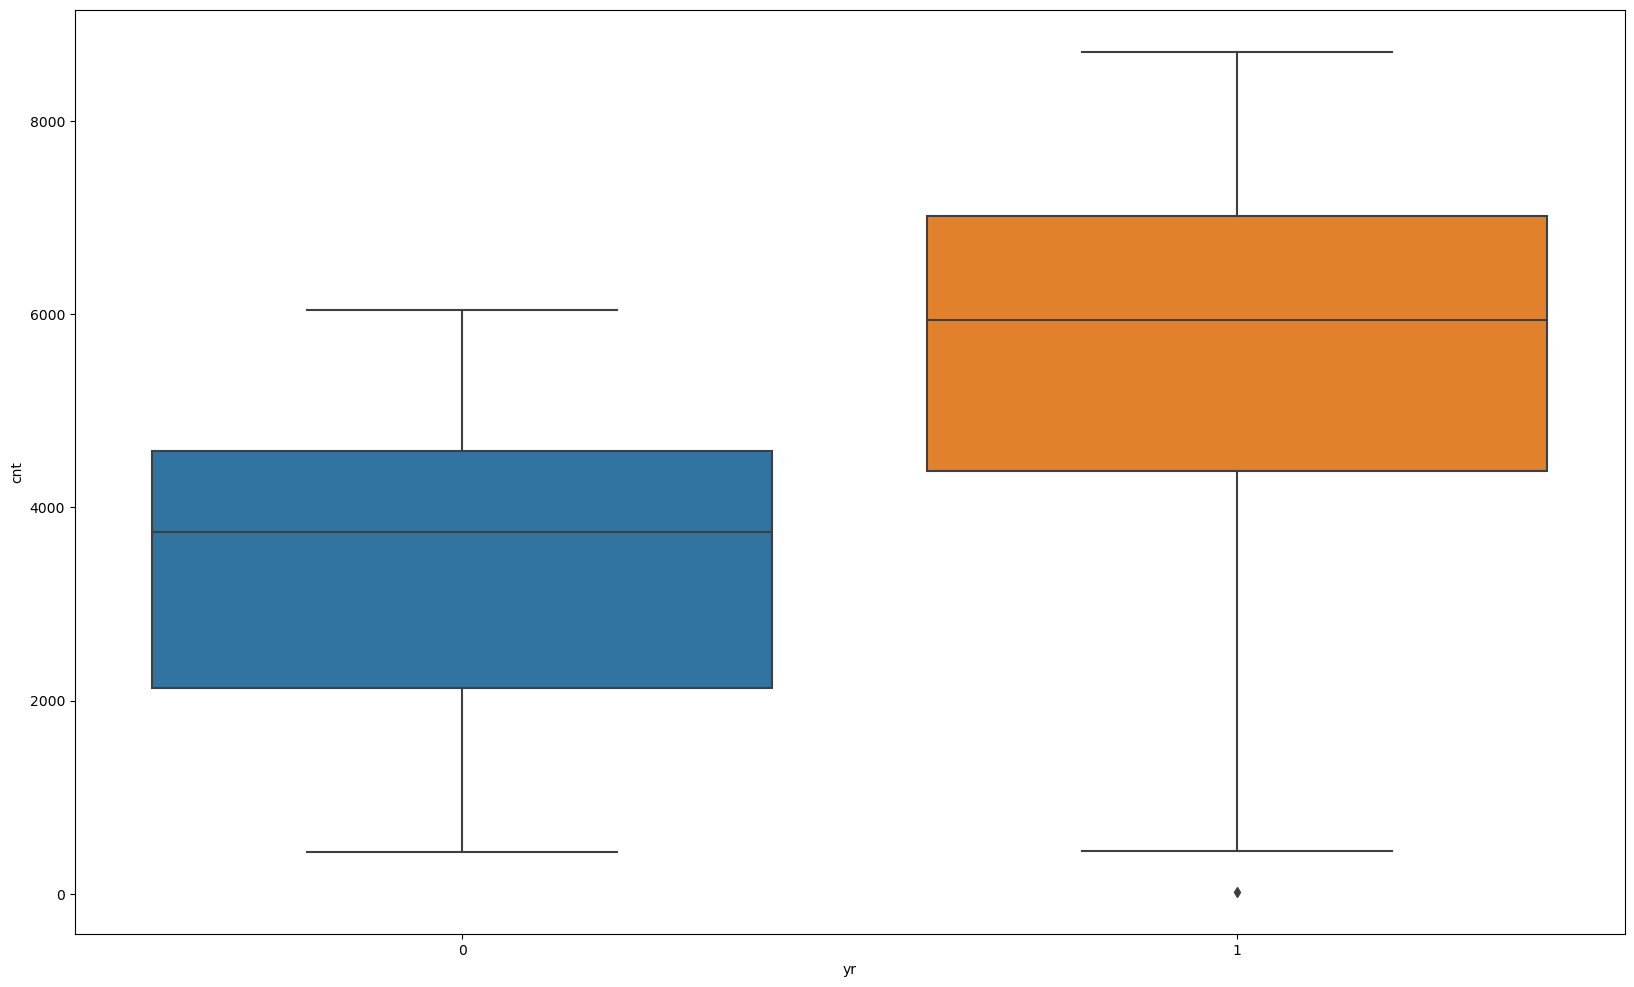

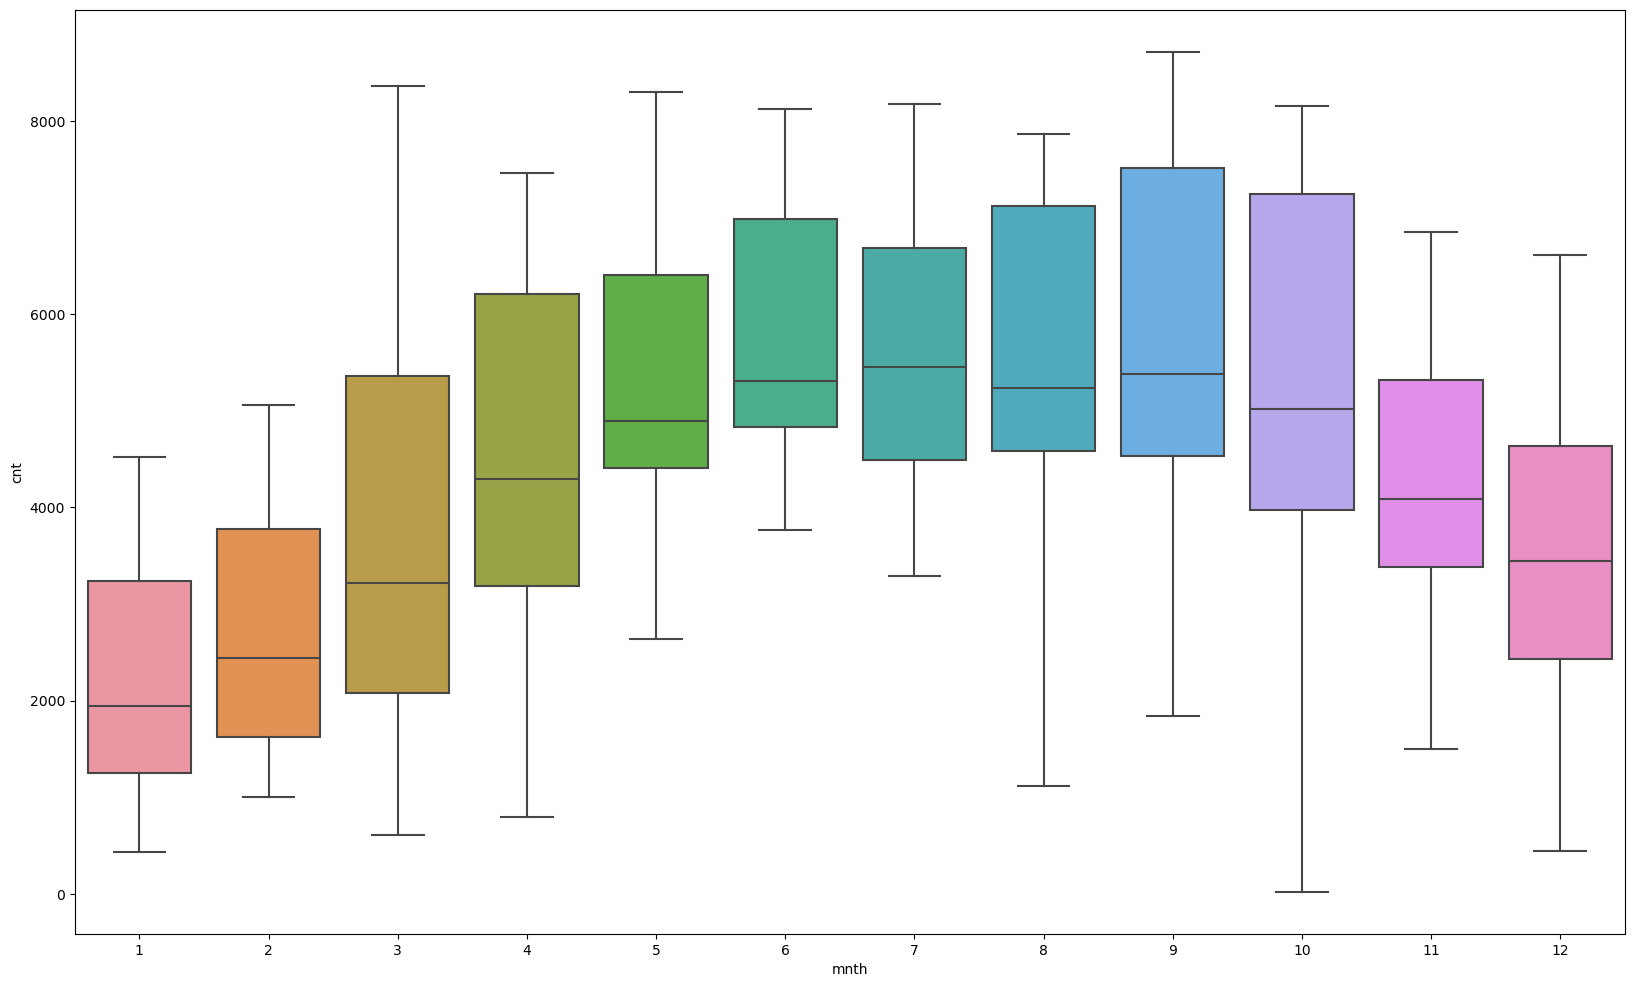

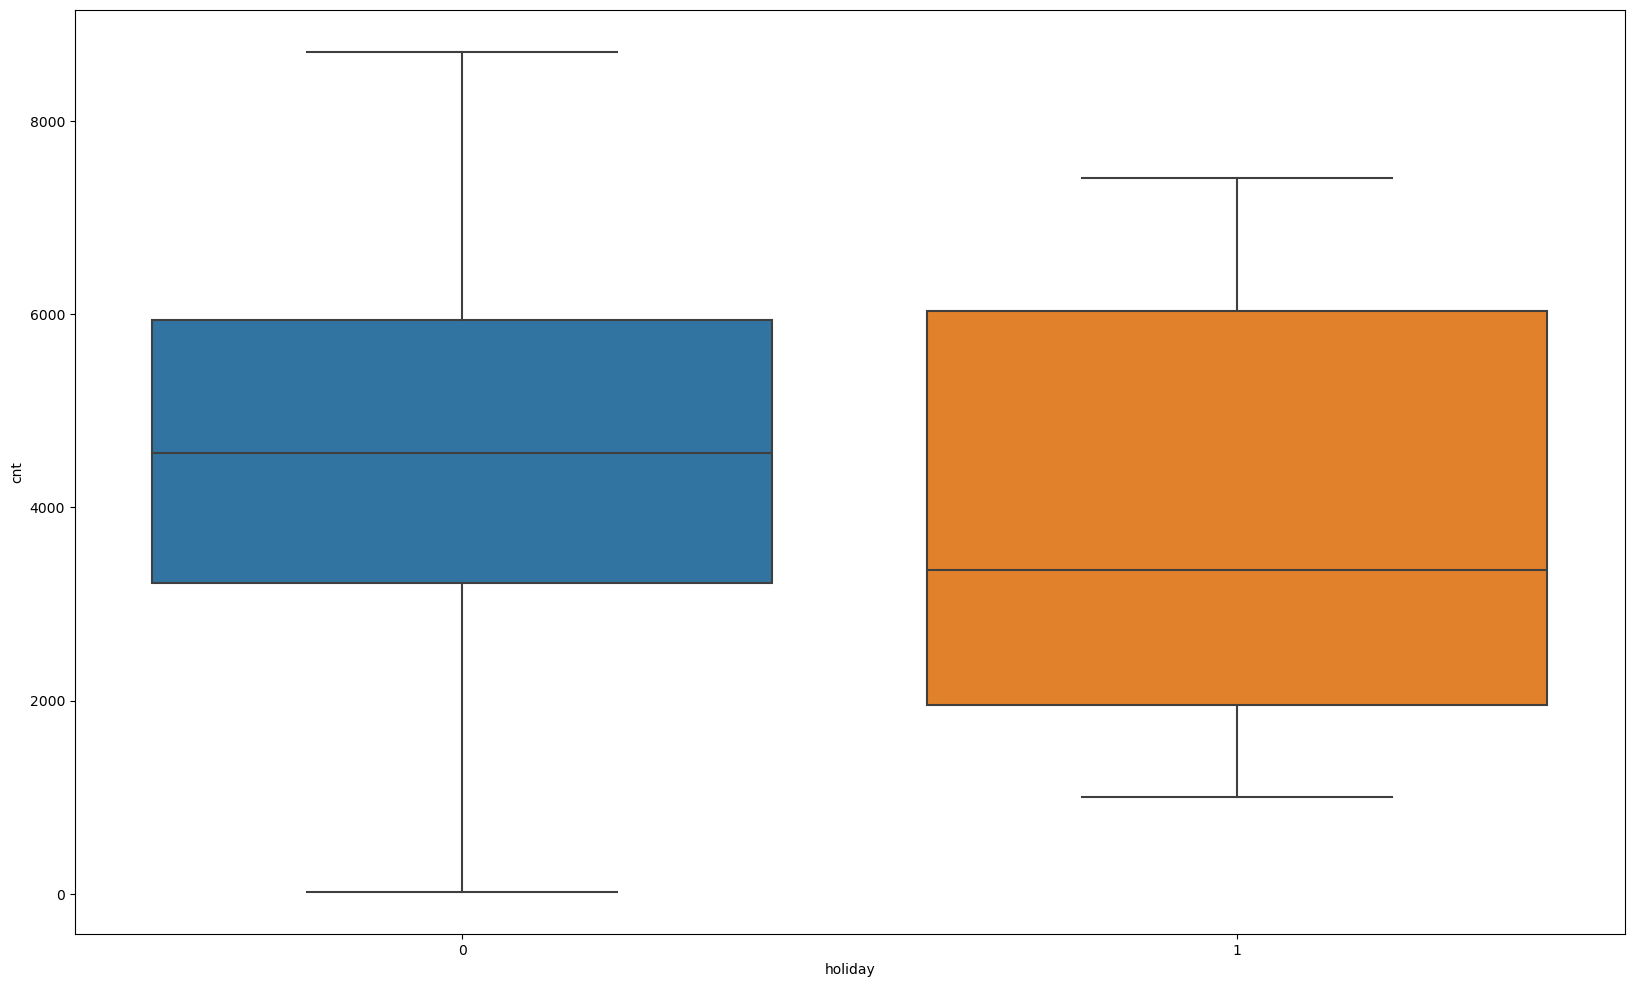

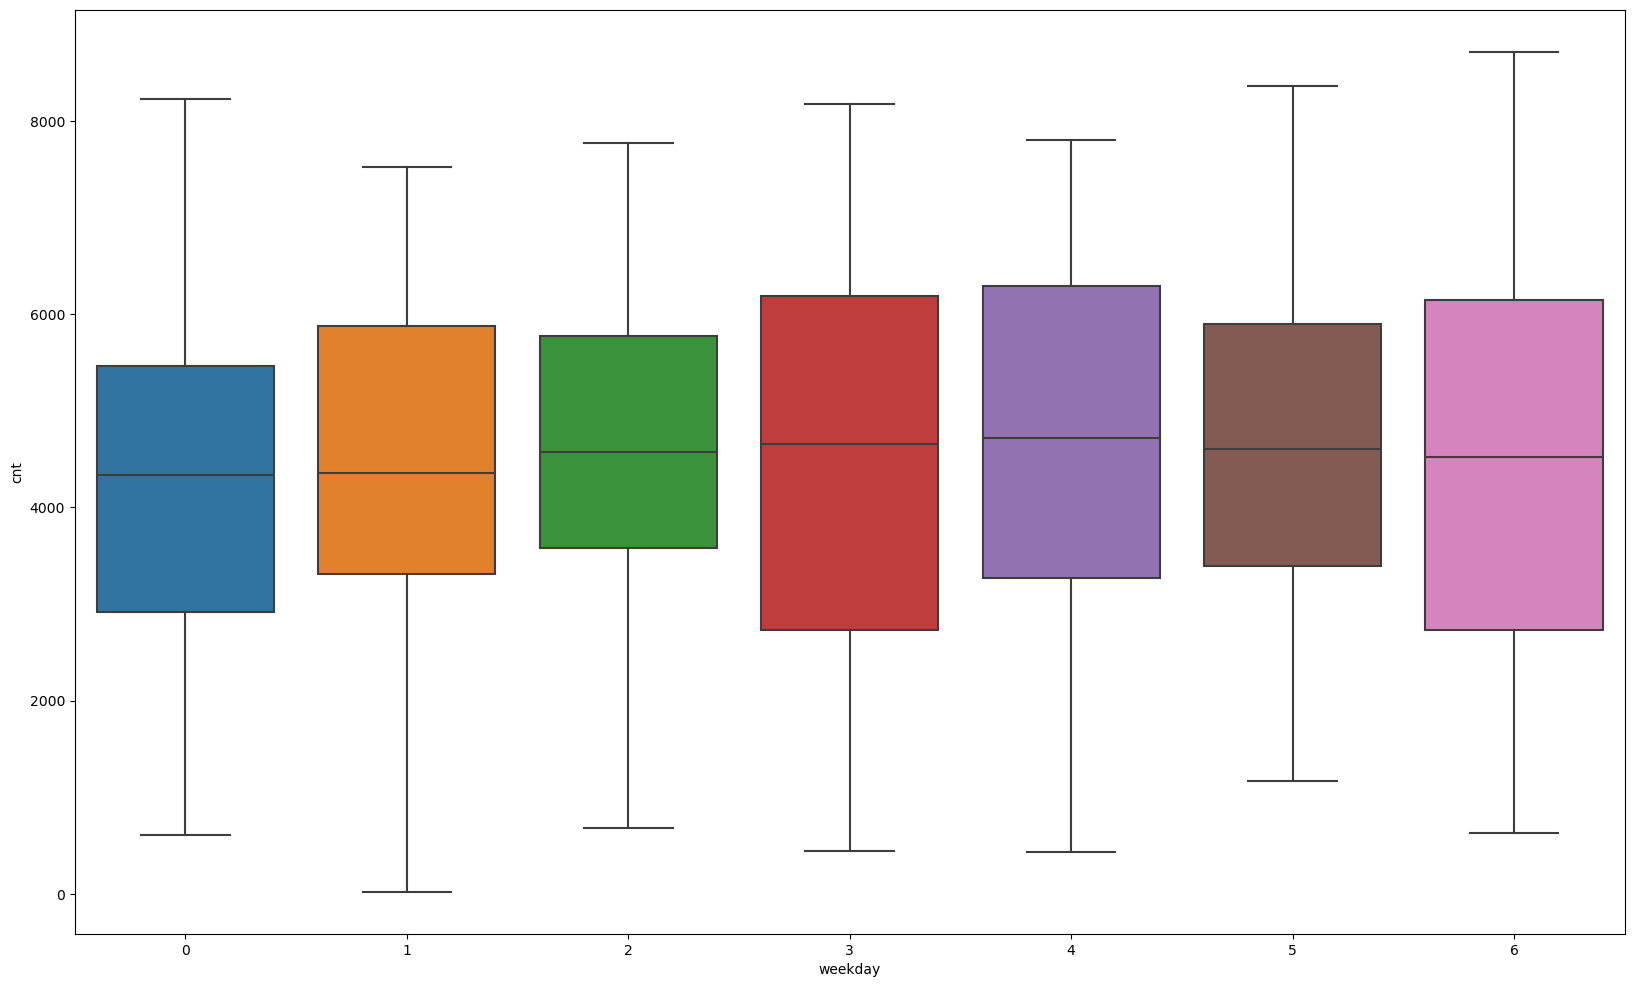

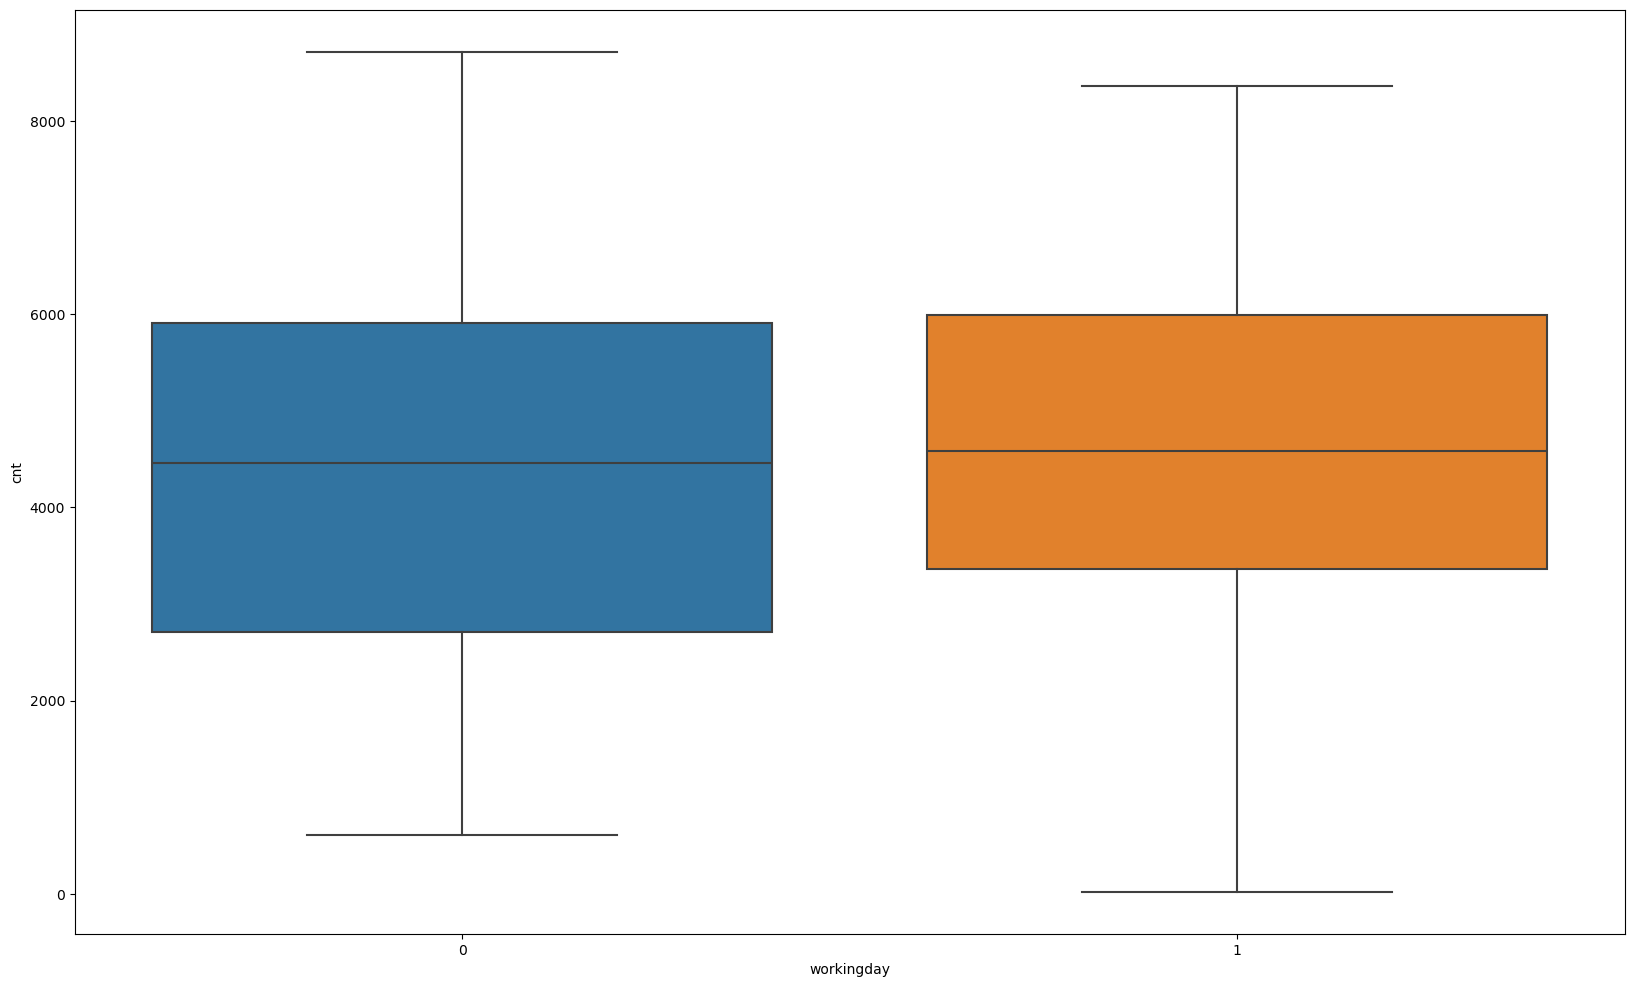

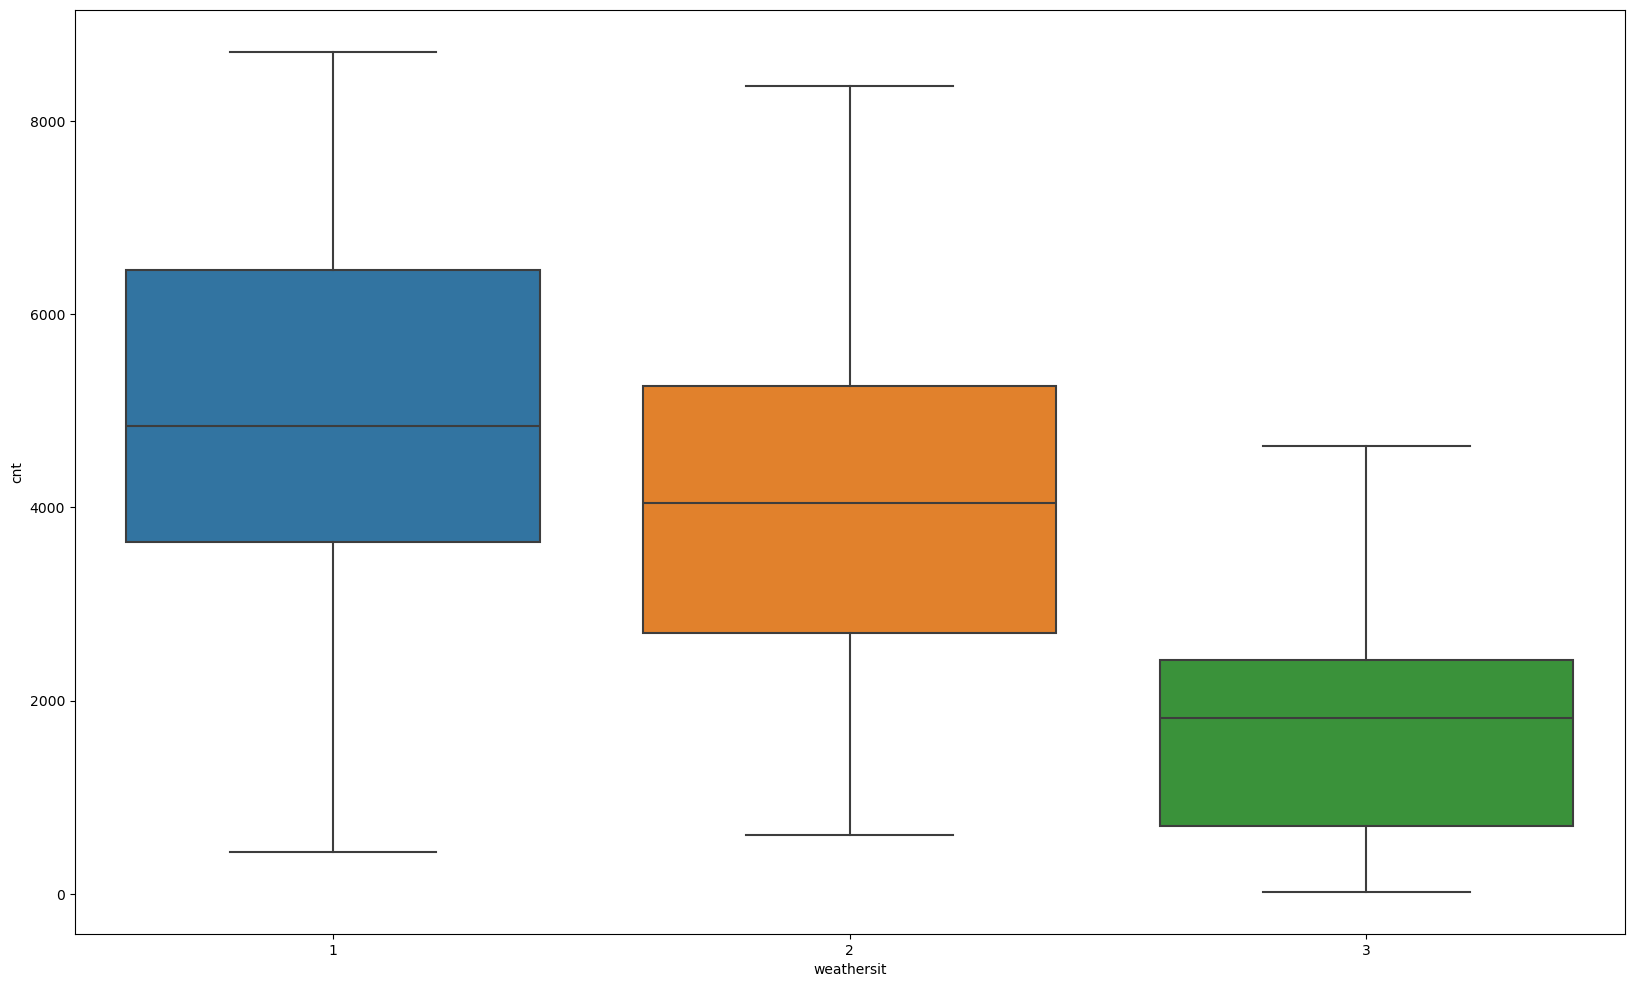

In [10]:
for column in categorical_vars:
    plt.figure(figsize=(20, 12))
    sns.boxplot(x = column, y = 'cnt', data = bike_bookings_df)
    plt.show()

Understanding categorical variables singnificance towards total count of bookings based on the above box plots
- seasons: 3(fall) >  2(summer) > 4(winter) > 1(spring)
- yr: 1(2019) > 0(2018)
- mnth: mid of year have more bookings
- weekday: The distribution of bookings are almost similar among all weekdays
- weathersit: 1(clear) > 2(mist) > 3(light snow). When there is a heavy rain(4) no bookings found.

Let's make a pairplot of all the numerical variables

In [11]:
numerical_vars = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

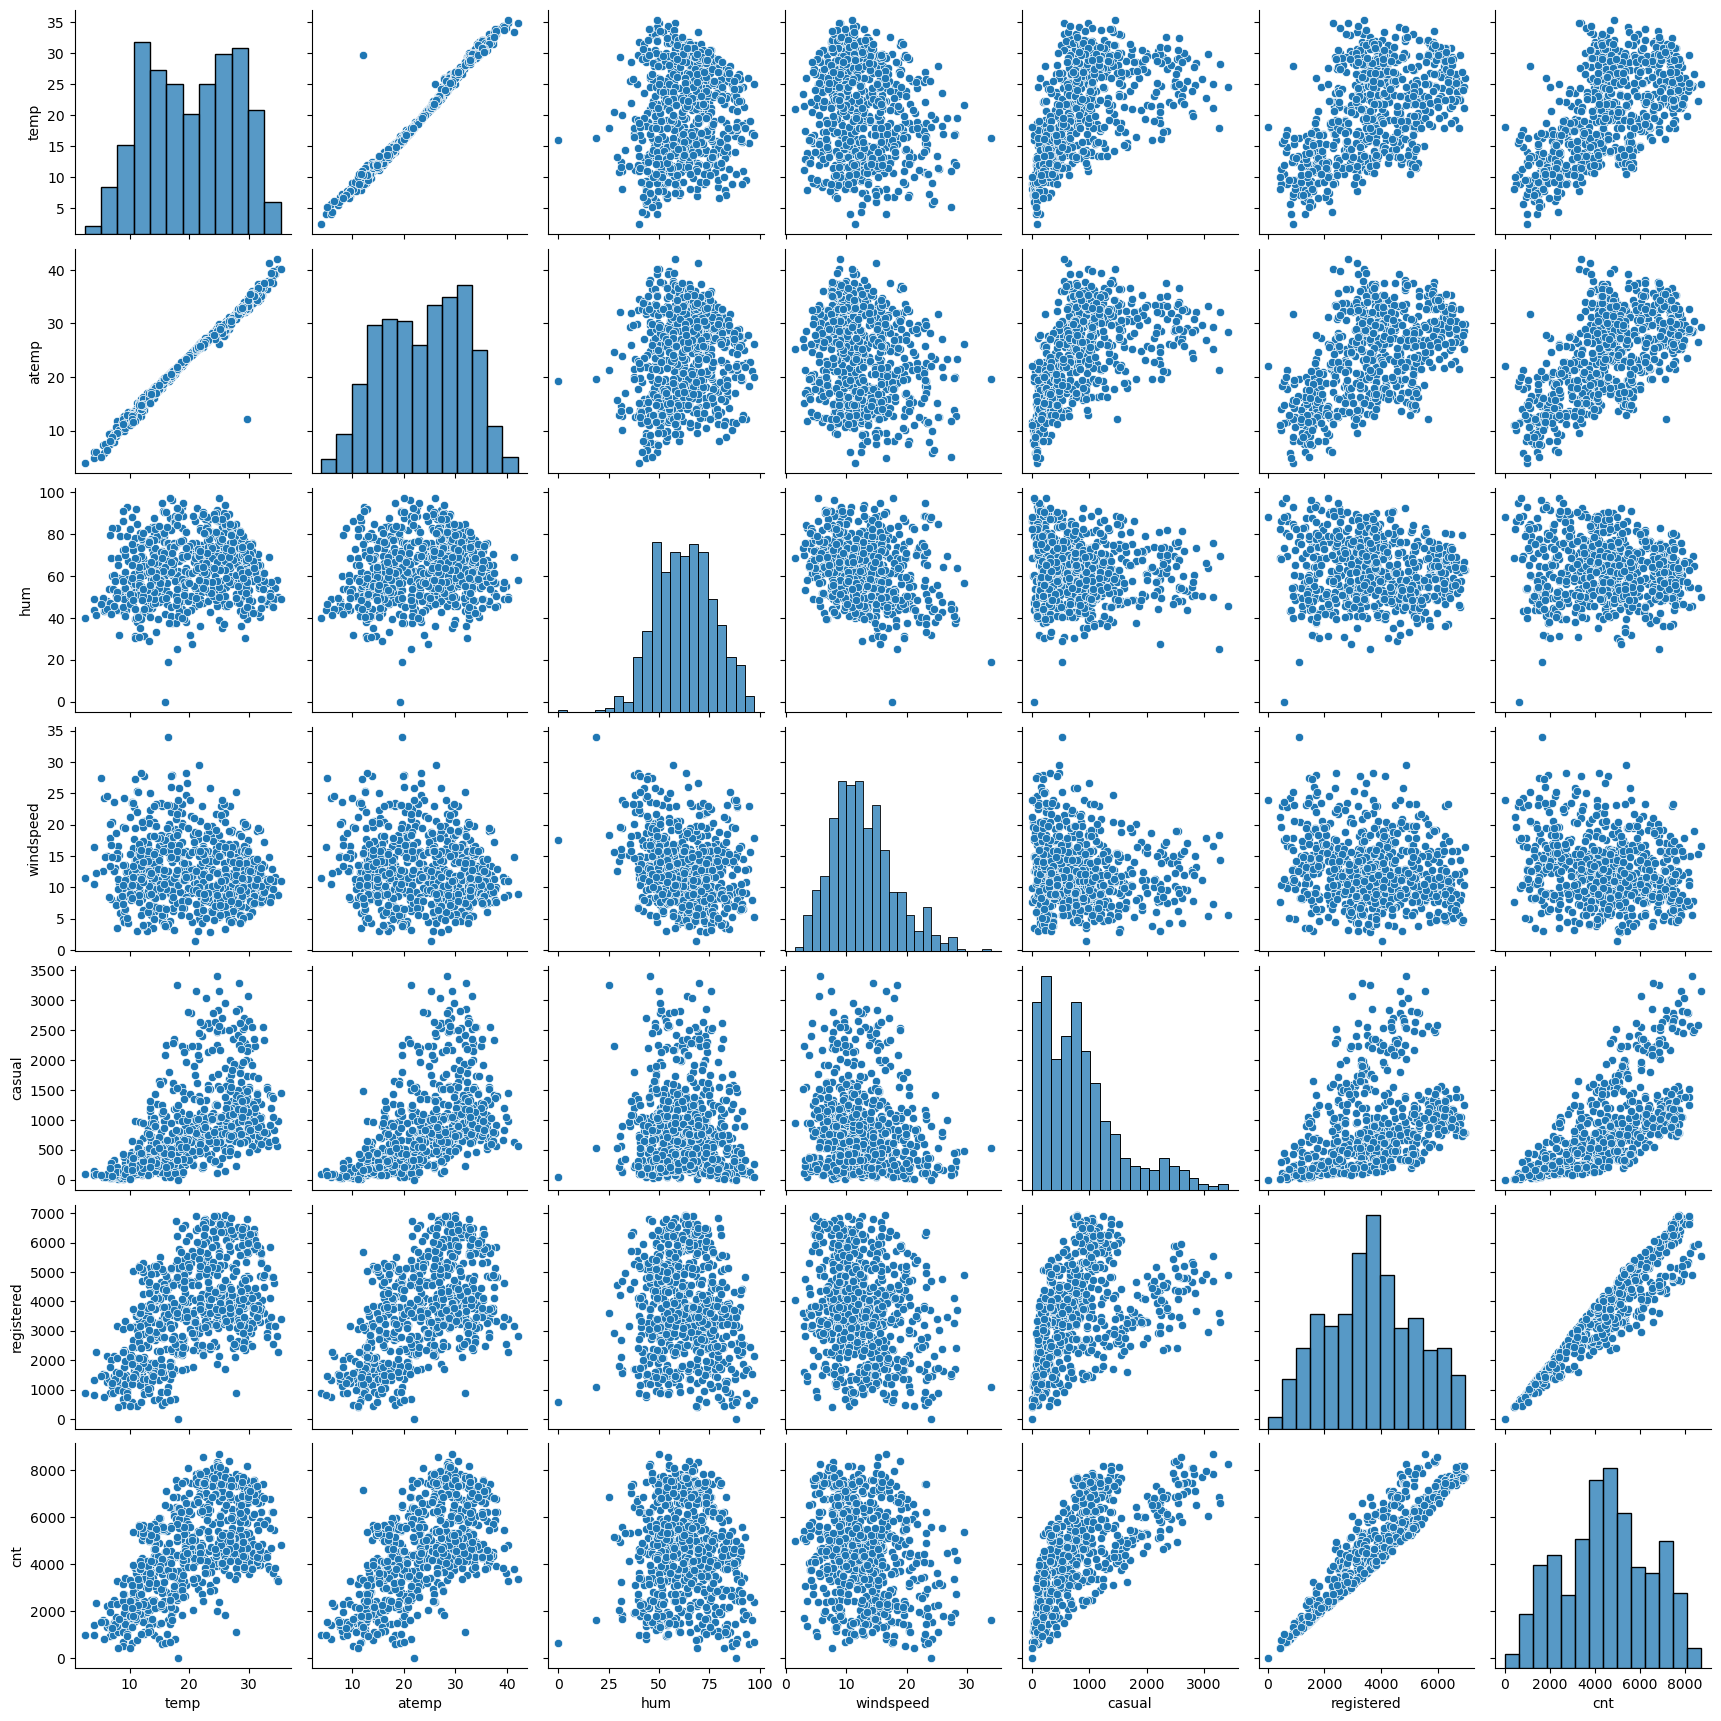

In [12]:
sns.pairplot(bike_bookings_df[numerical_vars])
plt.show()

In [13]:
bike_bookings_df[numerical_vars].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Understanding numerical variables singnificance towards total count of bookings based on above scatter plots

- temp and atemp are correalted -> leading to redundancy (multicollinearity)
- Found that cnt = registered + casual, which is a direct equation, where cnt is a target variable.

## Data Preparation

Removing below columns which are insignificant for model building
- instant
- dteday

In [14]:
bike_bookings_df = bike_bookings_df.drop(['instant', 'dteday'], axis=1)

Removing holiday column from dataframe, as workingday gives the information regarding holidays and weekends

In [15]:
bike_bookings_df = bike_bookings_df.drop(['holiday'], axis=1)

Renaming the column yr to 2019_yr, as the column value 1 is related to 2019 data.

In [16]:
bike_bookings_df = bike_bookings_df.rename(columns={'yr': '2019_yr'})

As observed from the above scatter plots and correlation matrix, temp and atemp are highly associated with each other, We could say that both columns show Multicollinearity.
Hence removing atemp column as it is redundant in model building

In [17]:
bike_bookings_df = bike_bookings_df.drop(['atemp'], axis=1)

As observed from the above box plots, season and mnth are highly associated with each other, We could say that both columns show Multicollinearity.
Hence removing mnth column as it is redundant in model building.

Also removing weekday, as it does not have much significance by looking at the box plots, and we have a working day column which provides information whether it is weekend or holiday or working day

In [18]:
bike_bookings_df.drop(['mnth'], axis = 1, inplace = True)
bike_bookings_df.drop(['weekday'], axis = 1, inplace = True)

As cnt = registered + casual is a direct equation, not considering them as independent variables and removing from dataframe

In [19]:
bike_bookings_df.drop(['casual'], axis = 1, inplace = True)
bike_bookings_df.drop(['registered'], axis = 1, inplace = True)

In [20]:
bike_bookings_df.head()

,season,2019_yr,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,2,14.110847,80.5833,10.749882,985
1,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,1,9.305237,43.6957,12.522300,1600


### Dummy Variables

The variable `season` has four levels. For this, we will use the concept of `dummy variables`.

In [21]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_status'

season_status = pd.get_dummies(bike_bookings_df['season'], dtype='int')

# Check what the dataset 'status' looks like
season_status.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [22]:
season_status = season_status.rename(columns={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
season_status.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now, you don't need four columns. You can drop the `spring` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `spring`
- `100` will correspond to `summer`
- `010` will correspond to `fall`
- `001` will correspond to `winter`

In [23]:
# Let's drop the first column from season_status df using 'drop_first = True'
season_status = pd.get_dummies(bike_bookings_df['season'], dtype='int', drop_first = True)
season_status = season_status.rename(columns={2: 'summer', 3: 'fall', 4: 'winter'})

# Add the results to the original bike_bookings_df dataframe
bike_bookings_df = pd.concat([bike_bookings_df, season_status], axis = 1)

# Now let's see the head of our dataframe.
bike_bookings_df.head()

,season,2019_yr,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,1,0,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,1,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,1,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,1,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0


In [24]:
# Drop 'season' as we have created the dummies for it
bike_bookings_df.drop(['season'], axis = 1, inplace = True)

bike_bookings_df.head()

,2019_yr,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,0,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0


Following the same procedure of creating dummies for the below variable
- weathersit

In [25]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_status'
# No records found for heavy rain weathersit, hence not dropping any dummy variables.
weathersit_status = pd.get_dummies(bike_bookings_df['weathersit'], dtype='int')
weathersit_status = weathersit_status.rename(columns={1: 'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'})

# Add the results to the original bike_bookings_df dataframe
bike_bookings_df = pd.concat([bike_bookings_df, weathersit_status], axis = 1)

# Drop 'weekday' as we have created the dummies for it
bike_bookings_df.drop(['weathersit'], axis = 1, inplace = True)

bike_bookings_df.head()

,2019_yr,workingday,temp,hum,windspeed,cnt,summer,fall,winter,clear,mist,light_snow
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_bookings_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ["temp", "hum", "windspeed", "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,2019_yr,workingday,temp,hum,windspeed,cnt,summer,fall,winter,clear,mist,light_snow
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,1,0


In [29]:
df_train.describe()

,2019_yr,workingday,temp,hum,windspeed,cnt,summer,fall,winter,clear,mist,light_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.627451,0.343137,0.029412
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


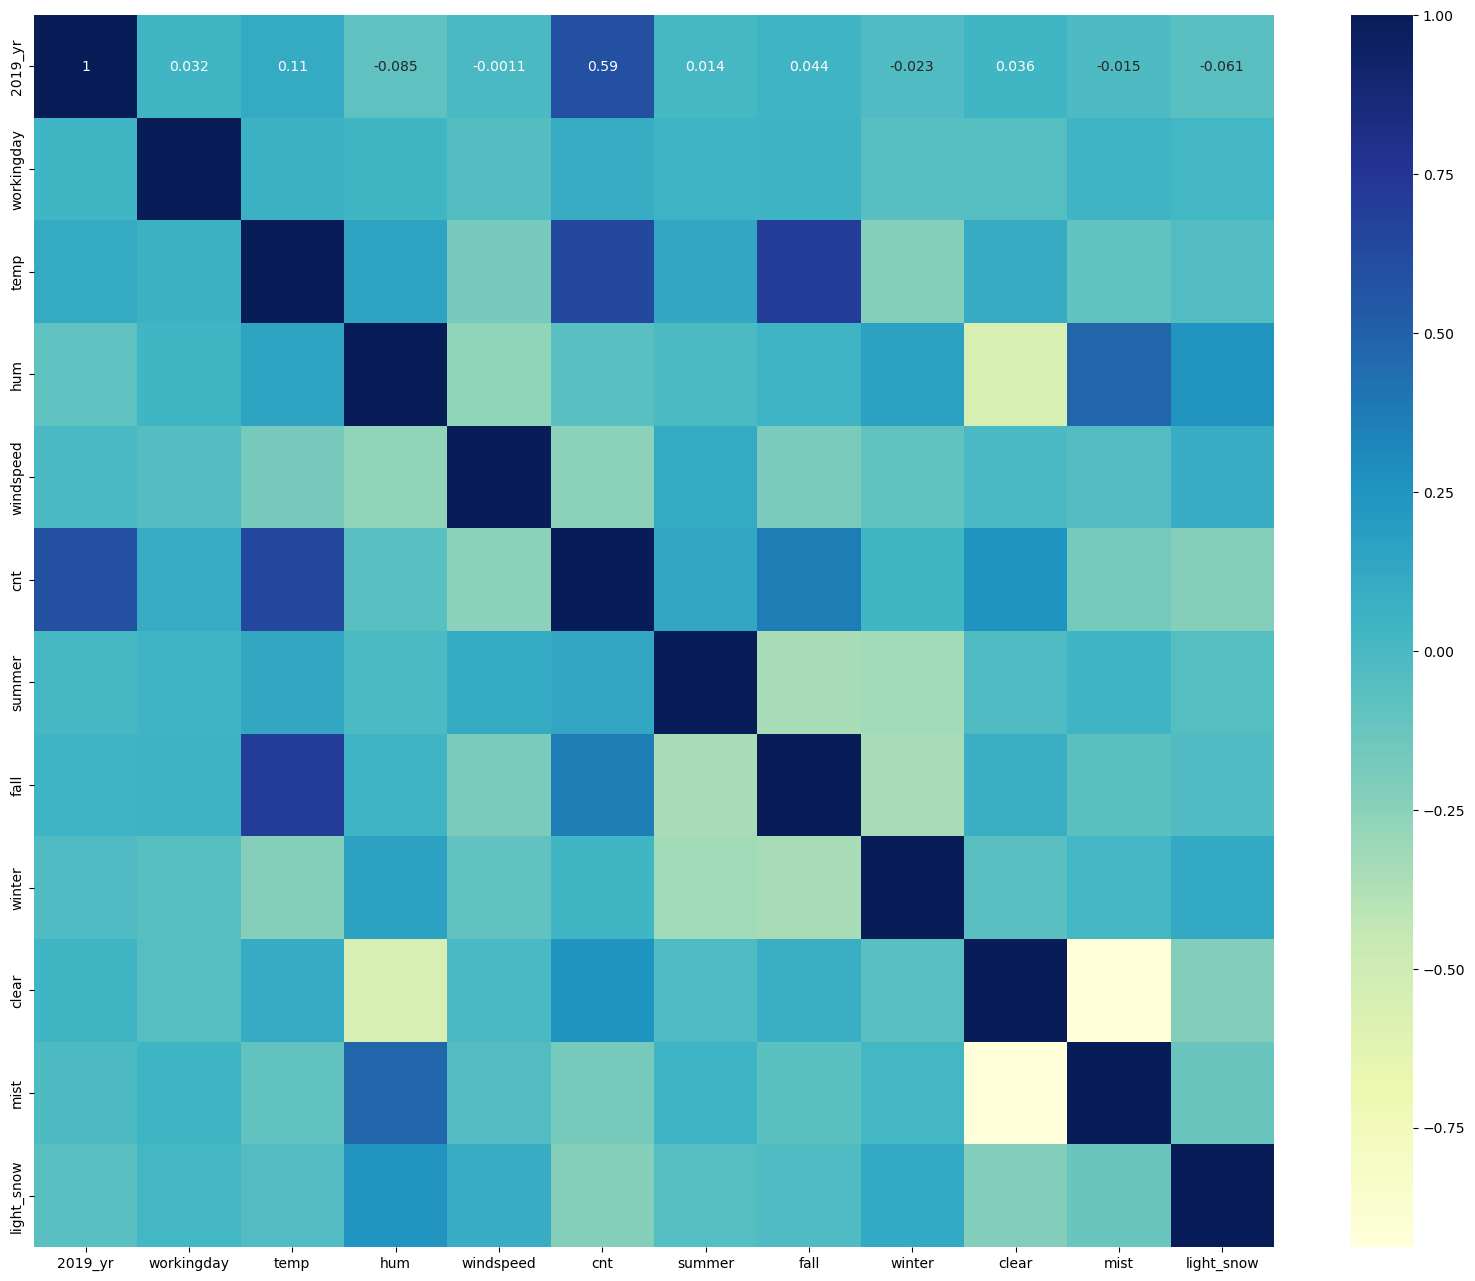

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heat map, we conclude that the target variable `cnt` seems to be correlated with the other independent variables

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 10)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('2019_yr', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('mist', True, 1),
 ('light_snow', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['2019_yr', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'clear', 'mist', 'light_snow'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          5.20e-182
Time:                        18:20:37   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0887      0.025      3.501      0.0

In [41]:
X_train_vif = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,clear,28.12
8,mist,21.68
5,fall,4.78
1,temp,3.50
9,light_snow,3.36
4,summer,2.53
2,hum,1.87
6,winter,1.87
3,windspeed,1.19
0,2019_yr,1.03


As the VIF of clear feature is greater and more than 10, we are removing this feature and building the model.

In [42]:
X_train_clear = X_train_rfe.drop(["clear"], axis = 1)
X_train_clear = sm.add_constant(X_train_clear)
lm = sm.OLS(y_train,X_train_clear).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          5.20e-182
Time:                        18:20:43   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2146      0.028      7.605      0.0

In [43]:
X_train_vif = X_train_clear.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,22.66
2,hum,14.95
5,fall,6.47
3,windspeed,3.62
4,summer,3.35
6,winter,2.48
7,mist,2.12
0,2019_yr,2.02
8,light_snow,1.16


As the VIF of temp feature is greater and more than 10, we are removing this feature and building the model.

In [44]:
X_train_temp = X_train_clear.drop(["temp"], axis = 1)
X_train_temp = sm.add_constant(X_train_temp)
lm = sm.OLS(y_train,X_train_temp).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          2.60e-146
Time:                        18:20:49   Log-Likelihood:                 393.96
No. Observations:                 510   AIC:                            -769.9
Df Residuals:                     501   BIC:                            -731.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2837      0.033      8.614      0.0

Removing the feature hum as it has high p value i.e. 0.899 which is greater than 0.05

In [45]:
X_train_hum = X_train_temp.drop(["hum"], axis = 1)
X_train_hum = sm.add_constant(X_train_hum)
lm = sm.OLS(y_train,X_train_hum).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          1.71e-147
Time:                        18:20:52   Log-Likelihood:                 393.95
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     502   BIC:                            -738.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.017     16.942      0.0

In [46]:
X_train_vif = X_train_hum.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.56
0,2019_yr,1.88
2,summer,1.60
4,winter,1.50
3,fall,1.45
5,mist,1.45
6,light_snow,1.08


Now as you can see, the VIFs and p-values both are within an acceptable range i.e. less than 5 and less than 0.05 respectively. So we go ahead and make our predictions using this model only.
Hence concluding the model with R2 value 0.752

This value indicates that approximately 75.2% of the variability in bike demand (cnt) is explained by the model. This is a good fit, showing that the selected variables describe the bike demand reasonably well.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms.

In [47]:
y_train_pred = lm.predict(X_train_hum)

In [48]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

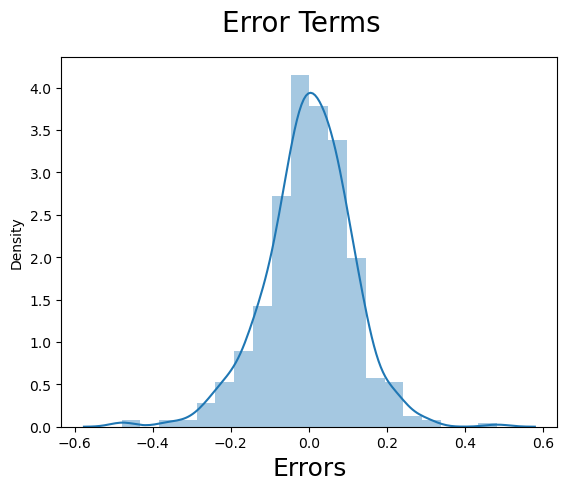

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

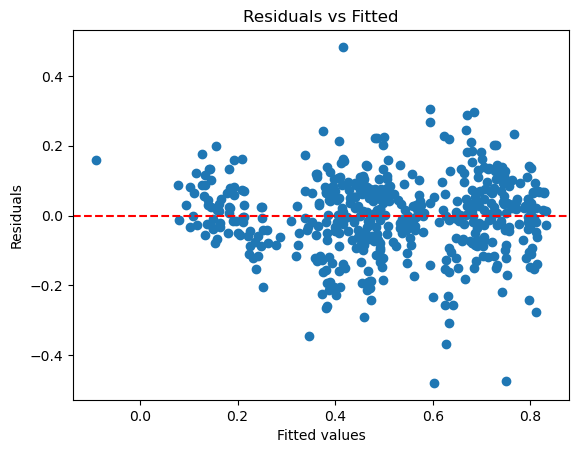

In [50]:
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

- Error terms are normally distributed with mean zero
- Error terms are independent of each other

## Making Predictions

#### Applying the scaling on the test sets

We have used num_vars in train set for scaling. Hence using that same list on test set

In [51]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
df_test.describe()

,2019_yr,workingday,temp,hum,windspeed,cnt,summer,fall,winter,clear,mist,light_snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.652968,0.319635,0.027397
std,0.500722,0.459904,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
X_train_hum.columns

Index(['const', '2019_yr', 'windspeed', 'summer', 'fall', 'winter', 'mist',
       'light_snow'],
      dtype='object')

In [55]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_hum.columns]

In [56]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

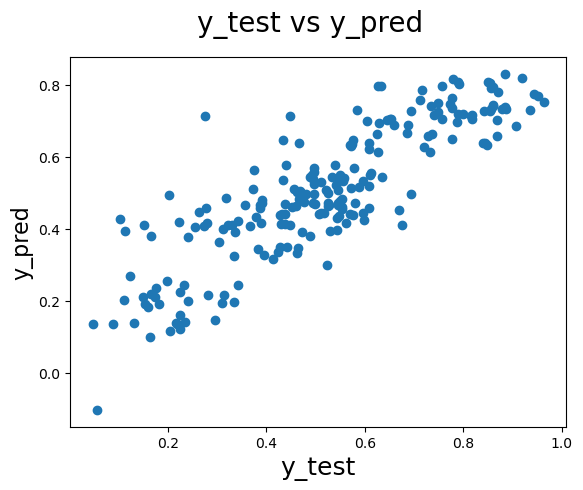

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Checking the R-squared on the test set

In [58]:
from sklearn.metrics import r2_score

In [59]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7352449894722238

With the above r_squared value = 0.7352, we can conclude that, this model has a good understanding of training data and it can predict the test data properly.


We can see that the equation of our best fitted line is:

$ cnt = 0.2801 + 0.2473  \times  2019\_yr - 0.1770  \times  windspeed + 0.2573 \times summer + 0.3162 \times fall + 0.2268 \times winter - 0.0857 \times mist - 0.2877 \times light\_snow $


#### Significant Variables in Predicting Bike Demand:
- 2019_yr: This variable indicates whether the data point is from the year 2019. It has a p-value of 0.000, suggesting strong significance. The positive coefficient (0.2473) indicates that bike demand increased in 2019.
- windspeed: The negative coefficient (-0.1770) with a p-value of 0.000 indicates that higher windspeed decreases bike demand.
- summer, fall, winter (season): These are dummy variables representing different seasons. All have significant p-values (0.000), indicating their importance in predicting bike demand. Positive coefficients for these variables suggest higher bike demand in these seasons compared to the omitted season (likely spring).
- mist: This variable represents weather conditions with mist, and its negative coefficient (-0.0857) indicates lower bike demand on misty days.
- light_snow: The negative coefficient (-0.2877) with a p-value of 0.000 shows that light snow significantly reduces bike demand.